In [ ]:
!pip install statsmodels

In [ ]:
%cd Python-VAR


/content/Python-VAR


In [ ]:
import pandas as pd
import statsmodels.api as sm
mdata = pd.read_csv("Final_logged_data.csv")
mdata.head()



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,year,UN,GDP,NOM,HW
0,1991,1.013511,4.337825,0.740600,1.146488
1,1992,1.049102,4.319727,0.714916,1.159615
2,1993,1.056028,4.303653,0.687618,1.167391
3,1994,1.016824,4.299625,0.694254,1.172895
4,1995,0.977220,4.314158,0.700790,1.177583


Exogenous Variables for the model with Lag: 4 
 ['const', 'L1.NOM_logdiff', 'L1.HW_logdiff', 'L1.UN_logdiff', 'L1.GDP_logdiff', 'L2.NOM_logdiff', 'L2.HW_logdiff', 'L2.UN_logdiff', 'L2.GDP_logdiff', 'L3.NOM_logdiff', 'L3.HW_logdiff', 'L3.UN_logdiff', 'L3.GDP_logdiff', 'L4.NOM_logdiff', 'L4.HW_logdiff', 'L4.UN_logdiff', 'L4.GDP_logdiff']
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 15, Apr, 2021
Time:                     19:55:23
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -35.0345
Nobs:                     24.0000    HQIC:                  -37.4868
Log likelihood:           392.250    FPE:                8.80738e-17
AIC:                     -38.3723    Det(Omega_mle):     1.03408e-17
--------------------------------------------------------------------
Results for equation NOM_logdiff
                    coefficient       st

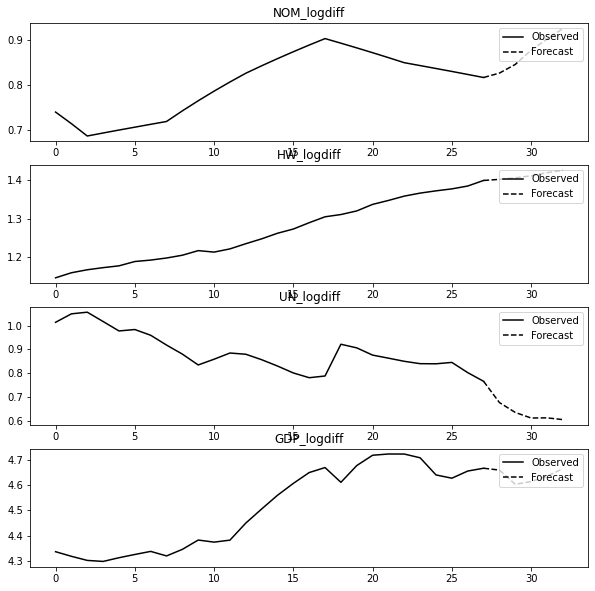

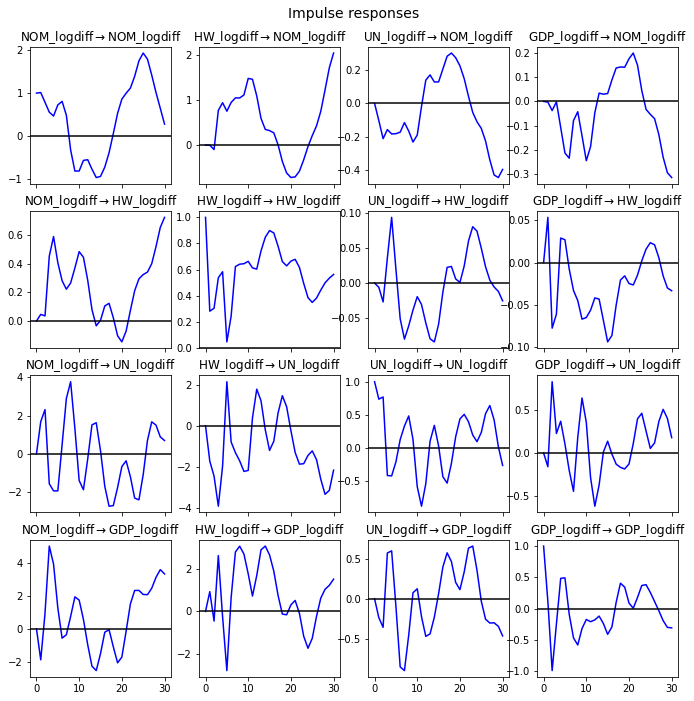

In [ ]:
import pandas as pd
from TimeSeries_Tests import *
from statsmodels.tsa.api import VAR, DynamicVAR
import statsmodels.api as sm
from statsmodels.tsa.base.datetools import dates_from_str

#########
# Load pre-loaded macroeconomic data from PANDAS
#########

mdata1 = mdata[['UN', 'NOM', 'HW', 'GDP']]
# mdata1.index = pd.DatetimeIndex(quarterly)

"""
a. Take Log difference of the level variables
b. Take differences of the rate variables
"""
mdata1['UN_logdiff'] = pd.Series(mdata1['UN'].dropna())
mdata1['GDP_logdiff'] = pd.Series(mdata1['GDP'].dropna())

mdata1['NOM_logdiff'] = pd.Series(mdata1['NOM'].dropna())
mdata1['HW_logdiff'] = pd.Series(mdata1['HW'].dropna())

"""
a. Drop NA
"""
mdata1.dropna(inplace = True)

"""
a. Prepare modeling dataset
"""
temp_data = pd.DataFrame(mdata1).dropna()
model_data = temp_data[['NOM_logdiff','HW_logdiff', 'UN_logdiff', 'GDP_logdiff']]

# Create VAR models -

def make_var_model(data, lags = 4, actual_plot = False ):
 
    # make a VAR model
    model = VAR(data)
    
    result_dict = {}
    for lag in range(lags, lags+1):
        
        results = model.fit(maxlags = lag)
        print ('Exogenous Variables for the model with Lag: %d \n '%lag+ str(results.exog_names))
        print (results.summary())
        
        if actual_plot ==True:
            results.plot()
            
        fitted_values = results.fittedvalues
        
        lag_order = results.k_ar
        
        forecast_values = pd.DataFrame(data = results.forecast(y= model_data.values[-lag_order:], steps=  5), columns = results.names)
        
        results.forecast_interval(y= model_data.values[-lag_order:], steps = 5)
        results.plot_forecast(steps = 5, plot_stderr = False)
        num_periods = 30
        ir = results.irf(periods=num_periods)
        ir.plot(plot_stderr=False)
        
        result_dict['Lag_Order_{}'.format(lag)] = results

    return result_dict

res  = make_var_model(data = model_data, lags = 4, actual_plot = False )
    
